# Non- Parametric Regression

- Unlike linear regression, nonparametric models don't output an R squared score, which we can use to describe the predictive performance of the model.
- Instead, we'll use metrics that measure the average degree of error in our model.
1. Mean Absolute Error
2. Root Mean Square Error

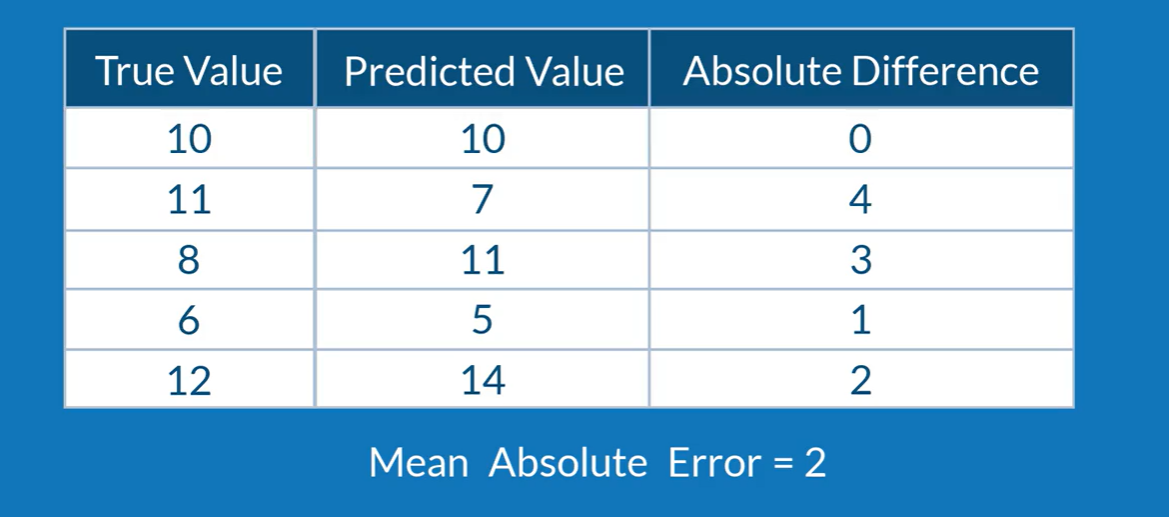

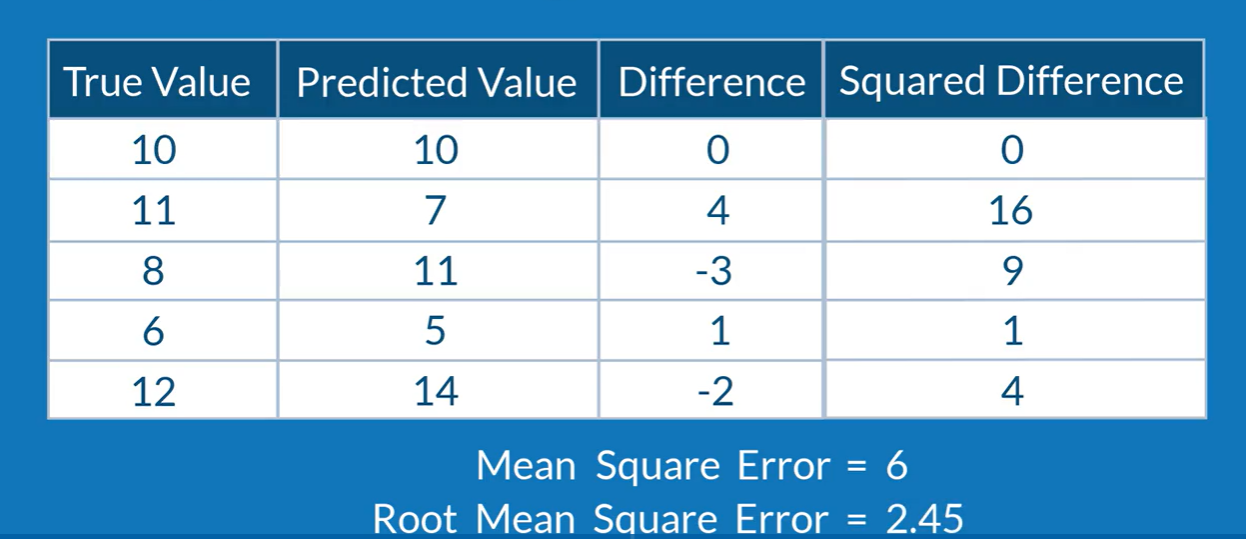

#### Conclusion
- First, we explored the meaning of nonparametric regression. We did this by first defining how linear regression is a form of parametric regression, and then compared that to the differences in nonparametric regression.
- Second, we learned how to evaluate nonparametric regression models. We learned that instead of R squared, we need to compare the error of different non-parametric models using mean absolute error and root mean square error.

In [1]:
import pandas as pd
from urllib.request import urlretrieve

url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/76/boston_housing.csv"

urlretrieve(url, "boston_housing.csv")

housing_dataset = pd.read_csv("boston_housing.csv",index_col=0)
housing_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [2]:
response = housing_dataset["medv"]
predictors = housing_dataset.iloc[:,:13]

In [3]:
from sklearn.model_selection import train_test_split

split = train_test_split(predictors, response, test_size=0.20, random_state=99)

predictors_train = split[0]
predictors_test = split[1]
response_train = split[2]
response_test = split[3]

# 1. Decision Tree Regression

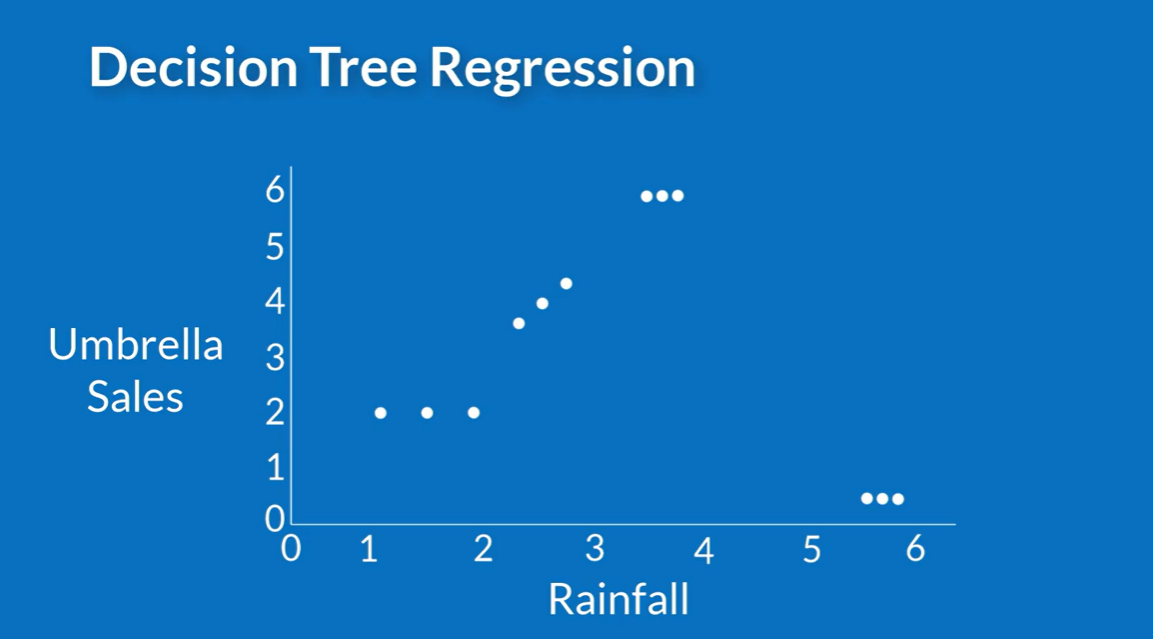

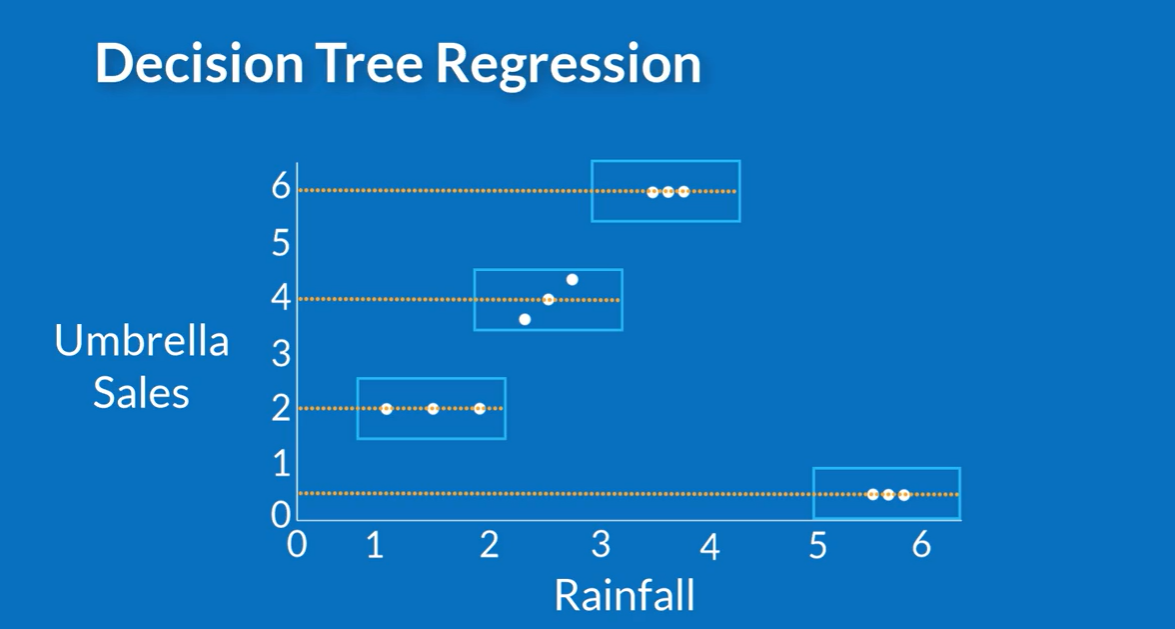

- Decision trees are normally used for classification, but we can use them to help with our regression problem. It works by creating separate nodes along the tree. Each node splits off a portion of the data from the rest of the data.
- We then take the average value for each node which becomes the prediction for that node. In this case, the decision tree would have four nodes.
    - The first one would be for rain below two millimeters, and which would predict dollars 2,000 of sales.
    - We then have one for rain below three millimeters which would predict umbrella sales of dollars 4,000.
    - We then have another for rain below four millimeters which would predict sales of dollars 6,000.
    - The final node would be for rain below six millimeters, and we'd predict sales of dollars 500.

In [4]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(predictors_train, response_train)

response_predictions = regressor.predict(predictors_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
from  numpy import sqrt

print('Mean Absolute Error:', mean_absolute_error(response_test, response_predictions))
print('Root Mean Squared Error:', sqrt(mean_squared_error(response_test, response_predictions)))
# The higher value for the root mean squared error, means that if there are outliers in the data
# The prediction will be off by a greater degree.

Mean Absolute Error: 0.10882352941176461
Root Mean Squared Error: 0.2463458432971901


In [5]:
print('Average Value of Response Feature:',round(response.mean(),1))

Average Value of Response Feature: 22.5


#### Conclusion
- First, we learn how decision tree regression works. We learn how it breaks our data into sections that each have separate regression lines with greater accuracy than a regression line for the whole data.
- Second, we applied decision tree regression in Python. We built a model and created metrics which we'll use to compare this model with other nonparametric regression models.
- We concluded that this model is a very good fit for our data, but how will it fair to other nonparametric models? In the next lesson, we'll learn how to apply another nonparametric regression model, k-nearest neighbor regression, and we'll see if it's an even better fit for our data.

# 2. K-nearest Neighbors Regression

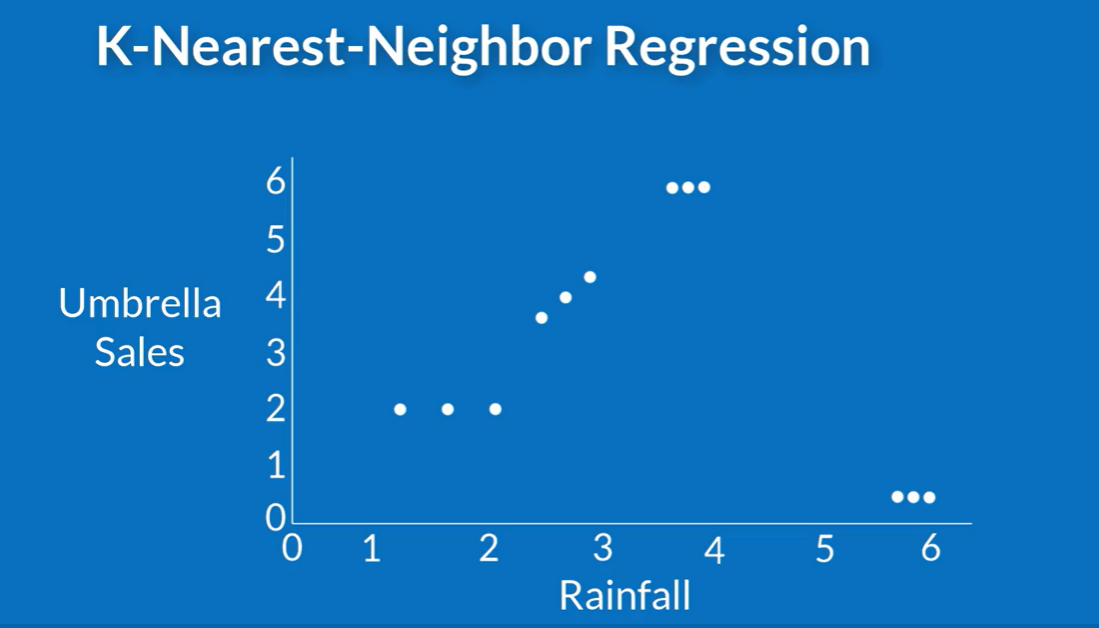

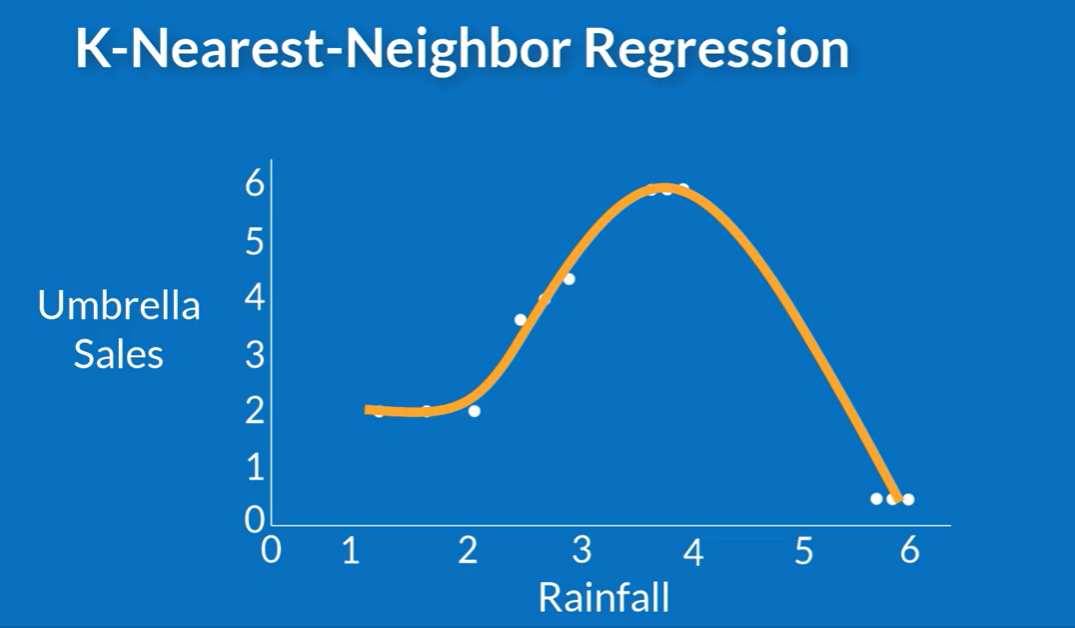

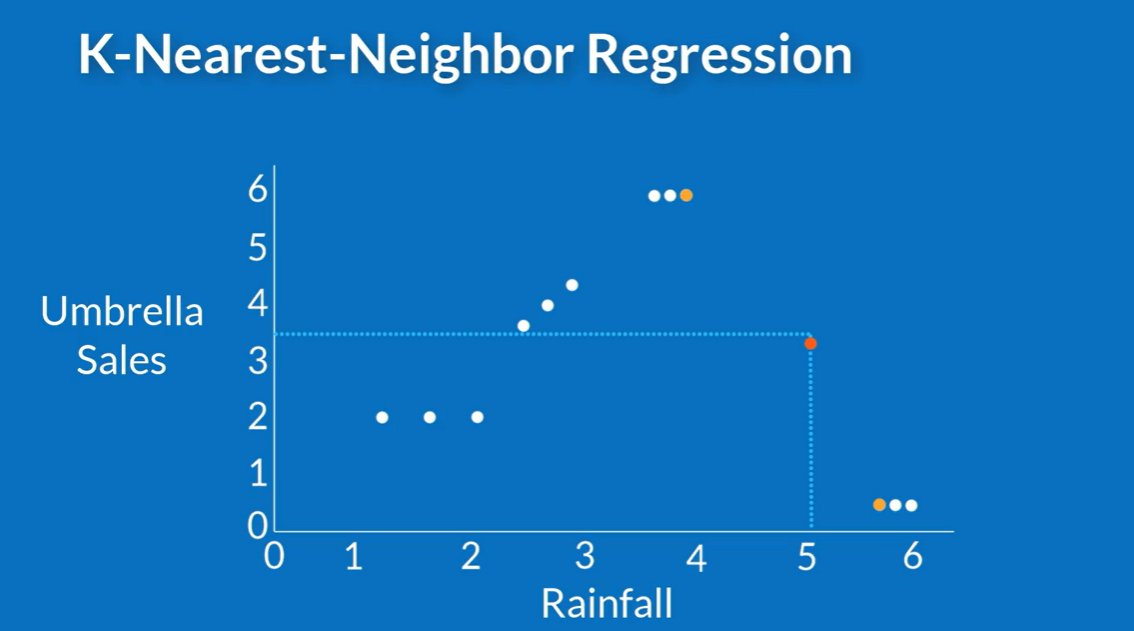

- K=2 neighbors
    - It's clear what our two nearest neighbors are. 5.75 millimeters and 4.25 millimeters.
    - To make a prediction, we now need to take the average sale value of these two neighbors.
    - 4.25 millimeters was associated with sales of dollars 6000. While 5.75 millimeters was associated with sales of dollars 0.5000.
    - The average of these two values is dollars 3.25000.
    - If we view our trend line again, we can see that our data point is now much closer to where it should be.

In [6]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=1)
regressor.fit(predictors_train, response_train)

response_predictions = regressor.predict(predictors_test)

print('Mean Absolute Error:', mean_absolute_error(response_test, response_predictions))
print('Root Mean Squared Error:', sqrt(mean_squared_error(response_test, response_predictions)))

Mean Absolute Error: 2.202941176470588
Root Mean Squared Error: 3.294067751722963


In [7]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=2)
regressor.fit(predictors_train, response_train)

response_predictions = regressor.predict(predictors_test)

print('Mean Absolute Error:', mean_absolute_error(response_test, response_predictions))
print('Root Mean Squared Error:', sqrt(mean_squared_error(response_test, response_predictions)))
# Better model but not better than Decision Trees

Mean Absolute Error: 2.1357843137254897
Root Mean Squared Error: 3.081606564700926


In [8]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(predictors_train, response_train)

response_predictions = regressor.predict(predictors_test)

print('Mean Absolute Error:', mean_absolute_error(response_test, response_predictions))
print('Root Mean Squared Error:', sqrt(mean_squared_error(response_test, response_predictions)))

Mean Absolute Error: 2.1676470588235297
Root Mean Squared Error: 3.1449461481096623


#### Conclusion
- First, we learned how K-nearest neighbors regression works. We learned that K nearest neighbors segregates data sets into separate groups based on proximity to a centroid, and that regression models are performed on each group.
- Second, we applied K-nearest neighbors regression in Python. We found the optimal number of neighbors. However, we saw that the error of this model was higher than our decision tree regression model.

# 3.  Support Vector Regression 

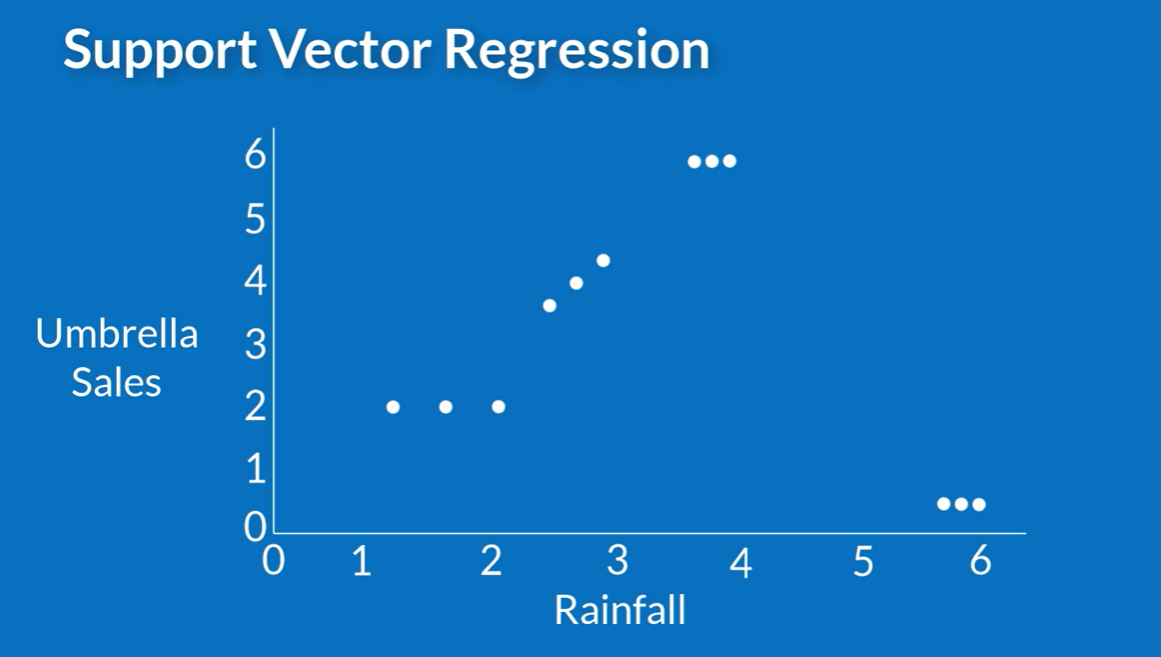

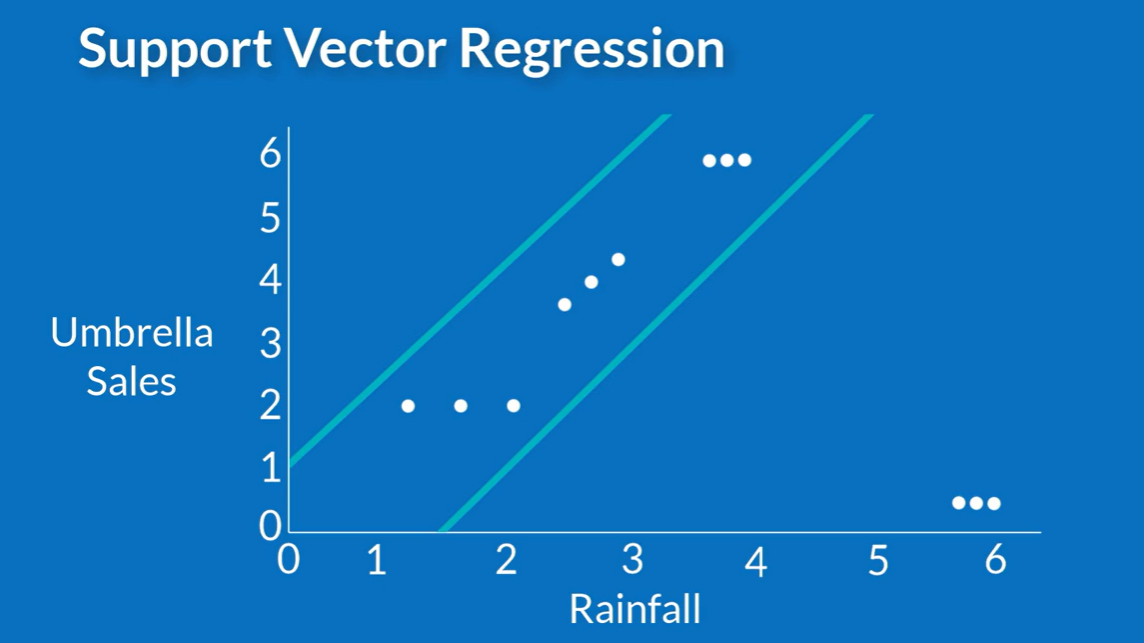

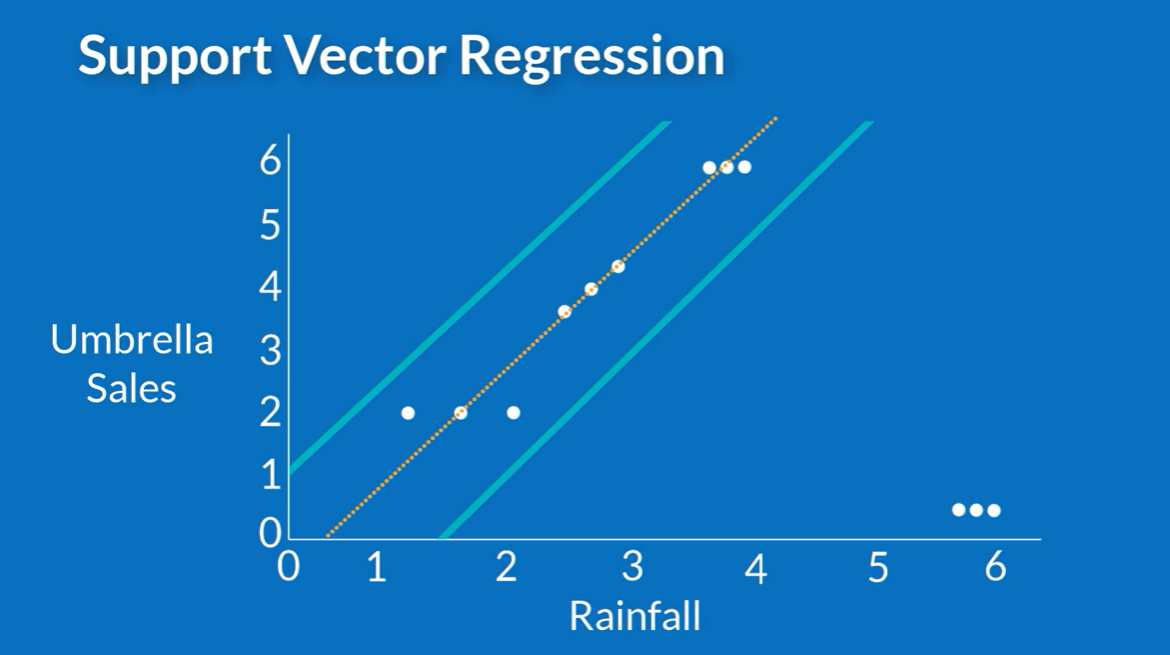

- Support vector regression, or SVR, works by creating a boundary with two lines called hyperplanes. The aim is to fit as many data points within the two planes as possible.
- Unlike linear regression, it's not too concerned if some values ended up being outside this boundary. If we were to run support vector regression on this data, we'd likely get hyperplanes that look like this.
- Three data points at the end are quite far away from the hyperplanes but most data points fall within.
- At this point, a new regression line is plotted right in the middle of these planes and then we simply use this line to make our predictions. What we have is a regression line that's willing to compromise some distant data points in order to be accurate for most other data points.

In [9]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(predictors_train, response_train)

response_predictions = regressor.predict(predictors_test)

print('Mean Absolute Error:', mean_absolute_error(response_test, response_predictions))
print('Root Mean Squared Error:', sqrt(mean_squared_error(response_test, response_predictions)))

Mean Absolute Error: 5.82030761638461
Root Mean Squared Error: 8.911503111021776


#### Conclusion
- First, we learned how support vector regression works. We learned that it can only segregate our data into two parts, which meant that at least one of the regression models had a sub-optimal performance.
- Second, we applied support vector regression in Python. We learned that this data set had a much higher degree of error than the other two non-parametric models.

# 4. Logistic Regression

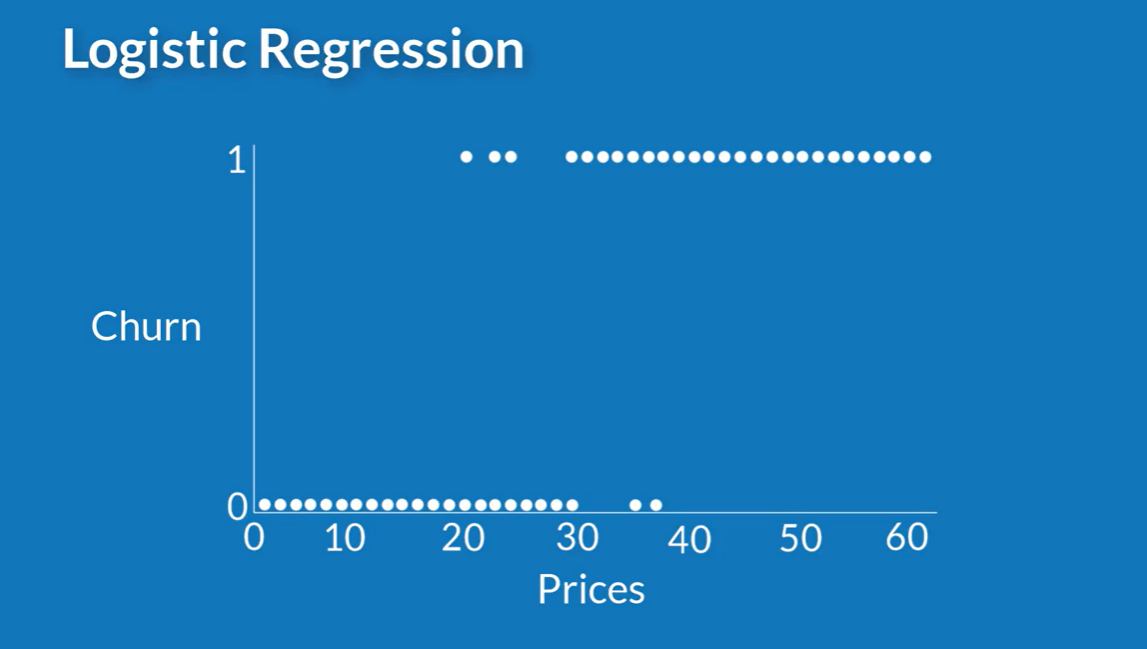

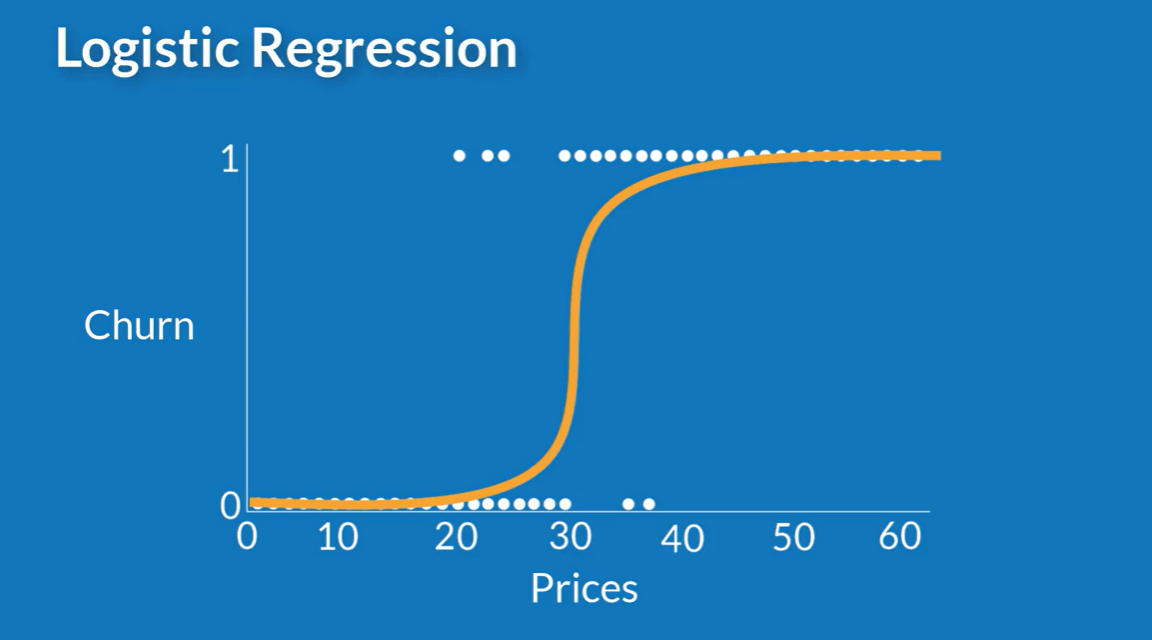

- We learned that when it comes to a binary response feature, a logistic curve is a much better fit.

In [10]:
import pandas as pd
from urllib.request import urlretrieve

url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/75/telecom_dataset.csv"

urlretrieve(url, "telecom_dataset.csv")

telecom_dataset = pd.read_csv("telecom_dataset.csv")
telecom_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,1,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,34,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,2,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),45,42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,2,70.70,151.65,1


In [11]:
response = telecom_dataset[["Churn"]]
predictors = telecom_dataset.drop("Churn", axis=1)

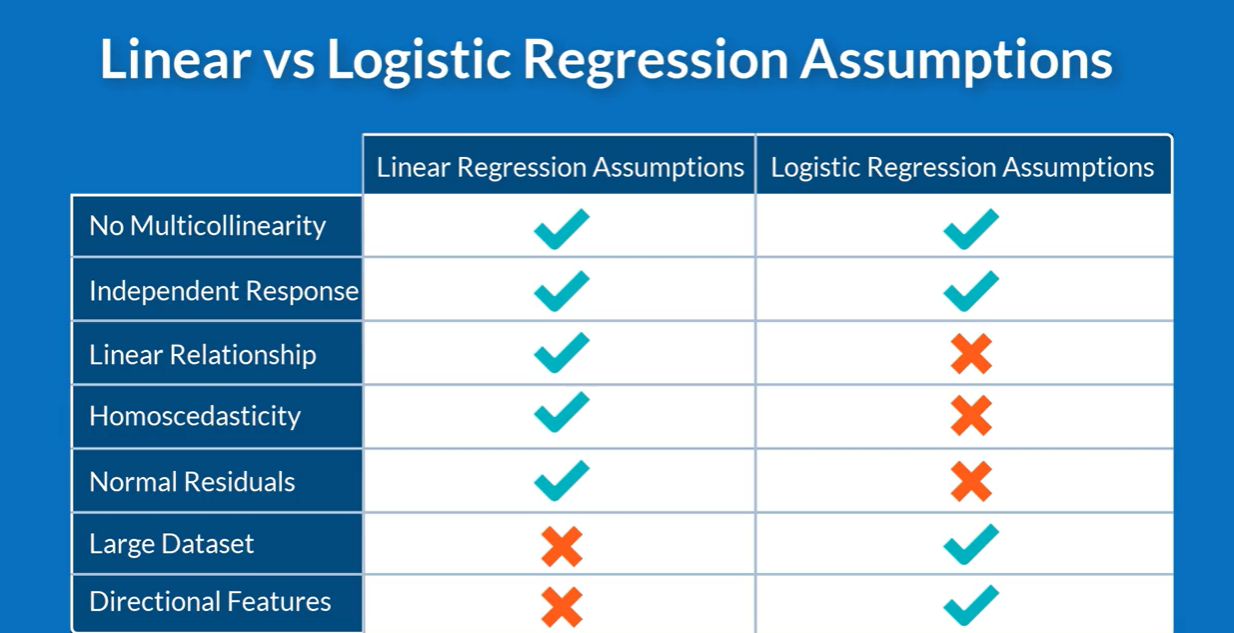

# Checking for Multicollinearity

<AxesSubplot:>

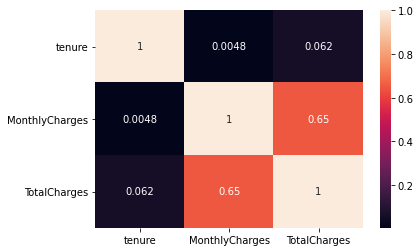

In [12]:
import seaborn as sns

correlation_matrix = telecom_dataset[["tenure","MonthlyCharges","TotalCharges"]].corr()
sns.heatmap(correlation_matrix, annot=True)

# Ensuring Features are Directional

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

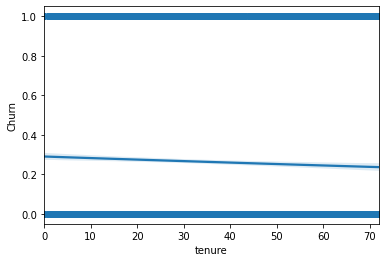

In [13]:
sns.regplot(x= 'tenure', y= 'Churn', data= telecom_dataset, logistic=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

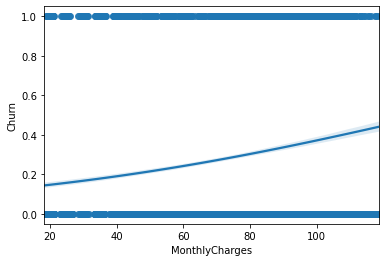

In [14]:
sns.regplot(x= 'MonthlyCharges', y= 'Churn', data= telecom_dataset, logistic=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

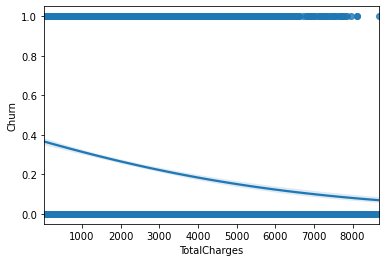

In [15]:
sns.regplot(x= 'TotalCharges', y= 'Churn', data= telecom_dataset, logistic=True)

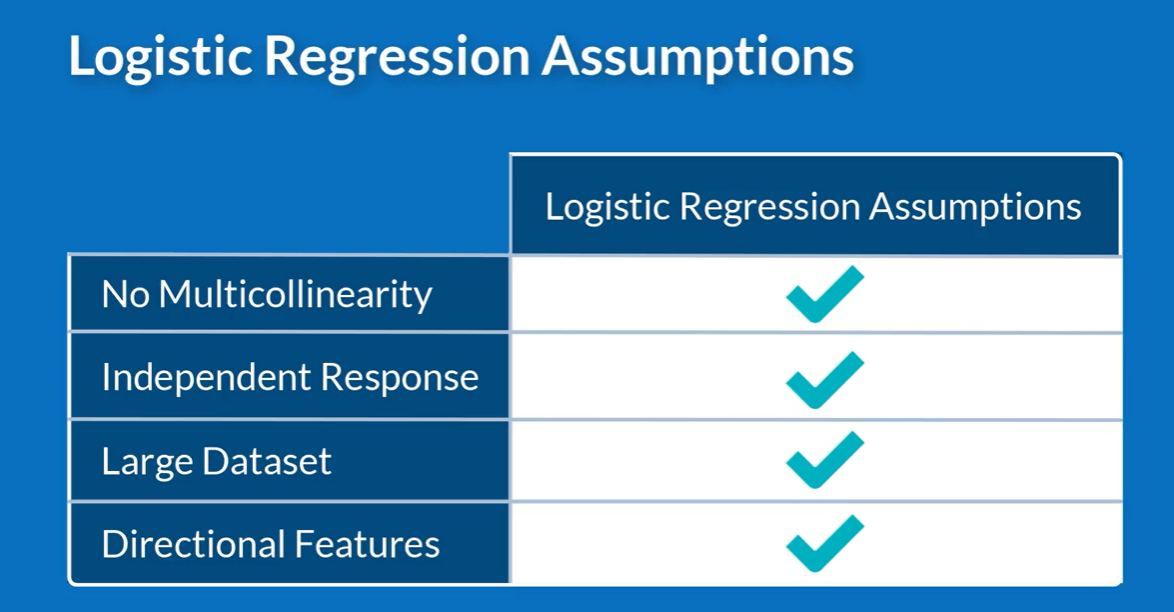

# Applying Logistic Regression

In [16]:
predictors=pd.get_dummies(predictors,drop_first=True)

In [17]:
from sklearn.model_selection import train_test_split

split = train_test_split(predictors, response, test_size=0.20, random_state=99)

predictors_train = split[0]
predictors_test = split[1]
response_train = split[2]
response_test = split[3]

In [18]:
from sklearn.linear_model import LogisticRegression
import numpy as np

regressor = LogisticRegression(solver='liblinear')
regressor.fit(predictors_train, np.ravel(response_train))

LogisticRegression(solver='liblinear')

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

response_predictions = regressor.predict(predictors_test)
print("  TN  FP")
print(confusion_matrix(response_test, response_predictions))
print("  FN  TP")
print()
print(classification_report(response_test, response_predictions,target_names=["Stayed","Churned"]))

  TN  FP
[[962  80]
 [201 164]]
  FN  TP

              precision    recall  f1-score   support

      Stayed       0.83      0.92      0.87      1042
     Churned       0.67      0.45      0.54       365

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407

